# Bubble Chart spätester Sonnenaufgang

In [1]:
import geopandas as gpd
import pandas as pd
import json
import os
import consts
import matplotlib.colors as mcolors
from utils import categorize_time_to_half_hour, categorize_time_to_half_hour_numerical, dt_to_time, time_to_time, categorize_time_to_6min_numerical, categorize_time_to_6min
import pyperclip
import plotly

In [2]:
# Load Grid
df_raw = gpd.read_file(consts.PATH_HEXAGRID_TIMEDATA)

In [3]:
import plotly.graph_objects as go

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Example data: Values on the x-axis
data = df_raw.sunrise_current_numerical


import plotly.graph_objects as go
from collections import Counter

# Example data: Values on the x-axis
# Count occurrences
counts = Counter(data)

# Dictionary to store the next available y-position for each x
stack_heights = {key: 0 for key in counts.keys()}

# Prepare x and y coordinates for bubbles
x_vals = []
y_vals = []

for x in data:
    y = stack_heights[x]  # Get current height
    x_vals.append(x)
    y_vals.append(y)
    stack_heights[x] += 20  # Increase stack height for next bubble

# Create bubble plot with Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=x_vals,
    y=y_vals,
    mode='markers',
    marker=dict(size=20, opacity=0.6, color='blue', line=dict(width=1, color='black'))
))

# Formatting
fig.update_layout(
    title="Bubble Histogram",
    xaxis=dict(title="Values", tickmode="array", tickvals=sorted(set(data))),
    yaxis=dict(visible=False),  # Hide y-axis
    showlegend=False
)

fig.show()

In [18]:
sorted_indices = np.argsort(df_raw.sunrise_current_dt)
time_data = np.array(df_raw.sunrise_current_dt)[sorted_indices]

In [20]:
time_data

array(['2025-01-01 07:19:09.916802+01:00',
       '2025-01-01 07:19:46.767448+01:00',
       '2025-01-01 07:20:11.507428+01:00', ...,
       '2025-12-31 11:44:56.888278+01:00',
       '2025-12-31 11:47:30.449150+02:00',
       '2025-12-31 11:53:57.932024+02:00'], shape=(6247,), dtype=object)

<Axes: >

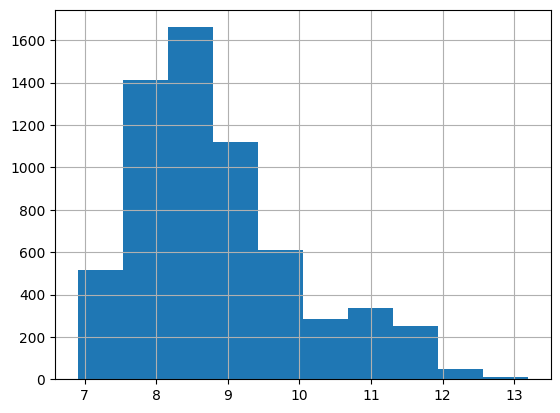

In [7]:
df_raw.sunrise_current_numerical.hist()

In [7]:
df_raw.sunrise_current

0       08:18:19.267487
1       08:46:24.995046
2       09:57:46.506656
3       07:28:40.715465
4       07:12:51.284532
             ...       
6242    08:39:49.243266
6243    08:30:30.303469
6244    09:57:31.818200
6245    07:56:47.043133
6246    10:13:51.763533
Name: sunrise_current, Length: 6247, dtype: object

In [8]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 19.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
